In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def preprocess_data(df, handle_duplicates=False):
   # Handle duplicates
    if handle_duplicates:
        df = df.drop_duplicates()

    # Handle missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

    # Convert date columns to datetime dtype
    date_columns = [col for col in df.columns if 'dte' in col.lower()]
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
        
    return df

In [3]:
df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,NaN
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,NaN,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,NaN
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,NaN,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


In [4]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8.024000e+03,8.024000e+03,0.0,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,6460.000000,8024.000000,8024.000000,8024.000000
mean,3.135320e+17,1.679340e+08,NaN,41.894243,-87.662688,214.153290,15.600823,46.117896,1.878774,61.574526,201.967971,13.419990
std,3.734884e+17,1.585120e+08,NaN,0.061762,0.043762,290.968254,42.986730,87.624549,1.870660,177.424596,125.235404,21.271301
min,2.384000e+03,2.153000e+03,NaN,41.646767,-87.847243,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.366225e+07,3.327857e+07,NaN,41.867065,-87.686212,93.000000,2.000000,1.000000,0.520000,1.000000,89.000000,0.000000
50%,5.121381e+07,1.074344e+08,NaN,41.897425,-87.657943,150.000000,2.000000,14.000000,1.520000,3.000000,221.000000,5.000000
75%,7.145524e+17,2.679861e+08,NaN,41.937238,-87.631716,240.000000,32.000000,53.000000,2.770000,16.000000,319.000000,22.000000
max,9.154715e+17,5.203376e+08,NaN,42.022200,-87.529541,10000.000000,1125.000000,3194.000000,57.140000,655.000000,365.000000,885.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8024 entries, 0 to 8023
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8024 non-null   int64  
 1   name                            8024 non-null   object 
 2   host_id                         8024 non-null   int64  
 3   host_name                       8024 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8024 non-null   object 
 6   latitude                        8024 non-null   float64
 7   longitude                       8024 non-null   float64
 8   room_type                       8024 non-null   object 
 9   price                           8024 non-null   int64  
 10  minimum_nights                  8024 non-null   int64  
 11  number_of_reviews               8024 non-null   int64  
 12  last_review                     64

In [6]:
df = preprocess_data(df)
df.drop(columns=['neighbourhood_group'], inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Condo in Chicago · ★4.99 · 1 bedroom · 1 bed ·...,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,129,3,220,2023-06-10,2.14,1,350,19,City registration pending
1,7126,Rental unit in Chicago · ★4.70 · 1 bedroom · 1...,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,94,32,493,2023-05-28,2.90,1,295,44,R21000075737
2,2907500,Home in Chicago · ★4.84 · 1 bedroom · 1 bed · ...,11231030,Erik,West Lawn,41.78225,-87.72806,Private room,39,1,335,2023-05-31,3.11,2,196,6,City registration pending
3,755701,Rental unit in Chicago · ★4.73 · 3 bedrooms · ...,3920450,Vas,Logan Square,41.93115,-87.71836,Entire home/apt,100,32,27,2022-12-01,0.22,4,198,3,City registration pending
4,10945,Rental unit in Chicago · ★4.64 · 2 bedrooms · ...,33004,At Home Inn,Lincoln Park,41.91196,-87.63981,Entire home/apt,219,4,66,2023-06-07,0.59,7,94,19,2209984


### Price distribution

#### We see that most prices are less than 500 dollar

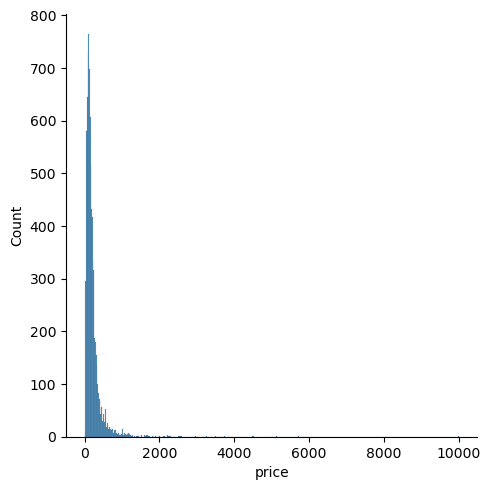

In [62]:
sns.displot(df['price'] , bins=500)
plt.show()

### Minimum nights

#### The 'minimum_nights' range from one night to a maximum of 1125 nights (approximately 3 years)

In [63]:
print(df['minimum_nights'].max())
print(df['minimum_nights'].min())

1125
1


### Minimum Nights by Room Type 

#### Private rooms have a higher minimum night requirement compared to other room types.

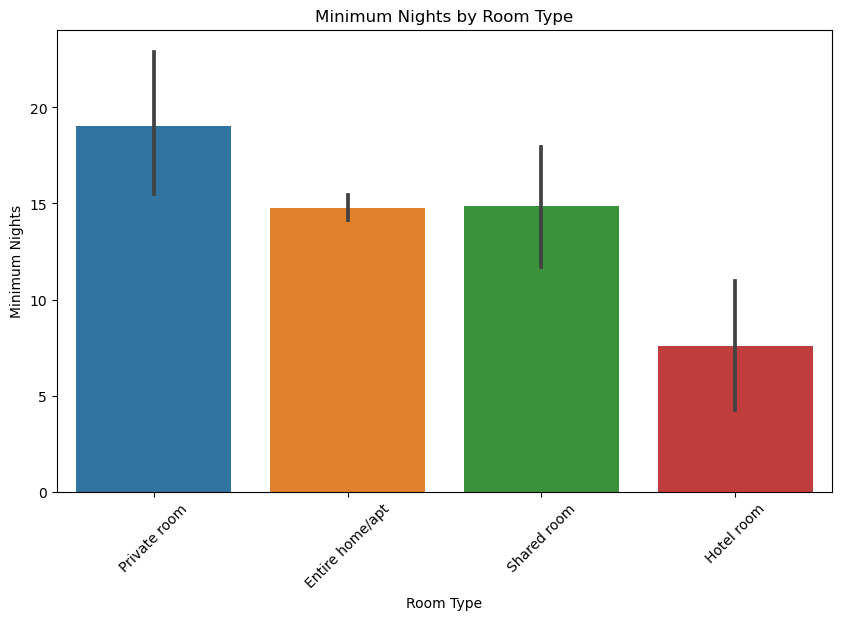

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='minimum_nights', data=df)
plt.title('Minimum Nights by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Minimum Nights')
plt.xticks(rotation=45)
plt.show()

### Availability

#### Over 1500 listings offer accommodations for one year or longer, while more than 100 listings are available for one month.

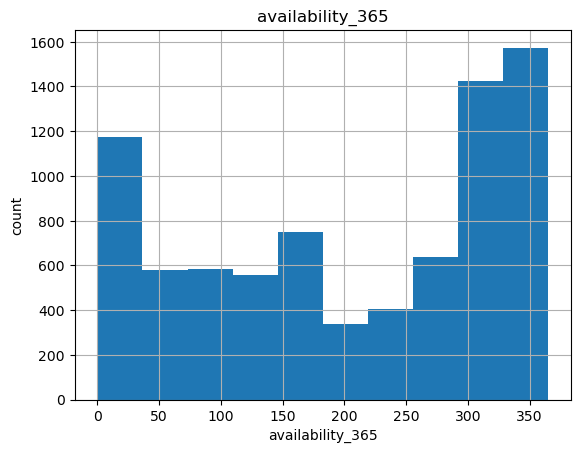

In [67]:
df['availability_365'].hist()
plt.title('availability_365')
plt.xlabel('availability_365')
plt.ylabel('count')
plt.show()

### Reviews per month

#### On average, there is one review submitted per month.

In [68]:
df['reviews_per_month'].mean()

1.8787739938081527

### Average Availability and price by Room Type

#### The average prices for different room types are as follows: Entire room: 250 dollar , Private room: 100 dollar ,  Shared room: 50 dollar , Hotel room: 180 dollar

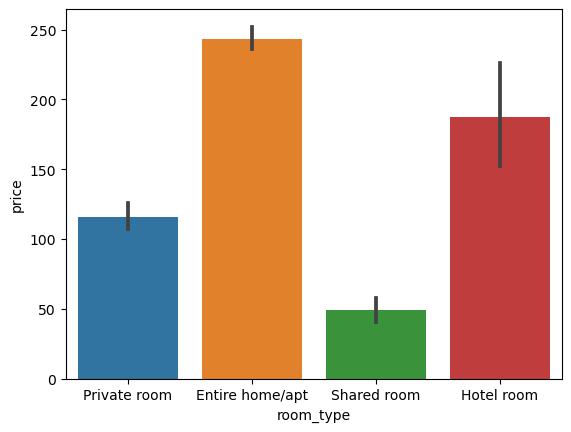

In [25]:
sns.barplot(x='room_type', y='price', data=df)
plt.show()

#### We observe that, on average, the availability for all types of rooms is approximately 200 days.

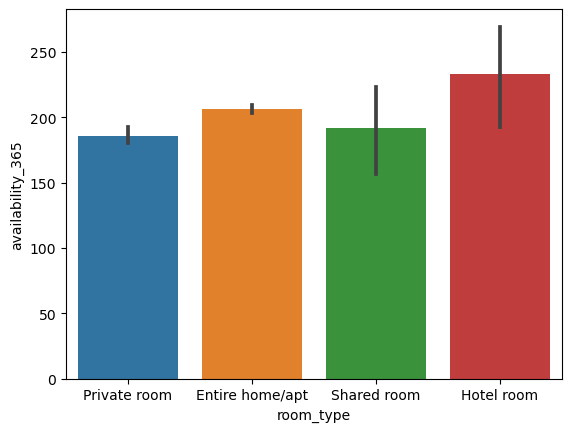

In [27]:
sns.barplot(x='room_type', y='availability_365', data=df)
plt.show()

### Correlation Between Number of Reviews and Price 

#### There seems to be a correlation between lower prices and higher review counts, possibly because lower-priced listings are more commonly booked and reviewed.

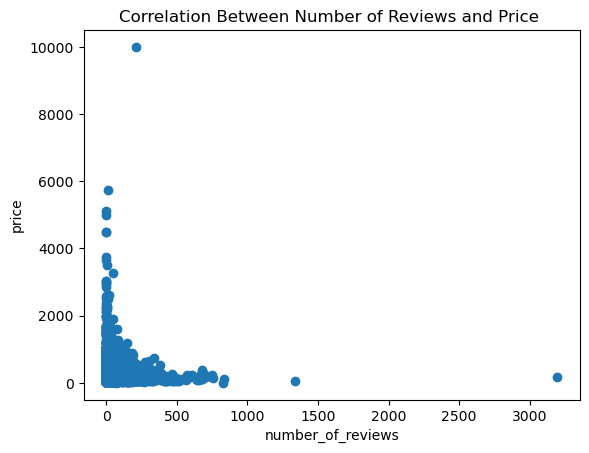

In [70]:
plt.scatter(df['number_of_reviews'], df['price'])
plt.title('Correlation Between Number of Reviews and Price ')
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.show()

### Price Distribution by Neighborhood

#### Listings in neighborhoods like Lincoln Park and near north side have notably higher prices, due to their desirable location, upscale amenities, and strong demand from a wealthier clientele.

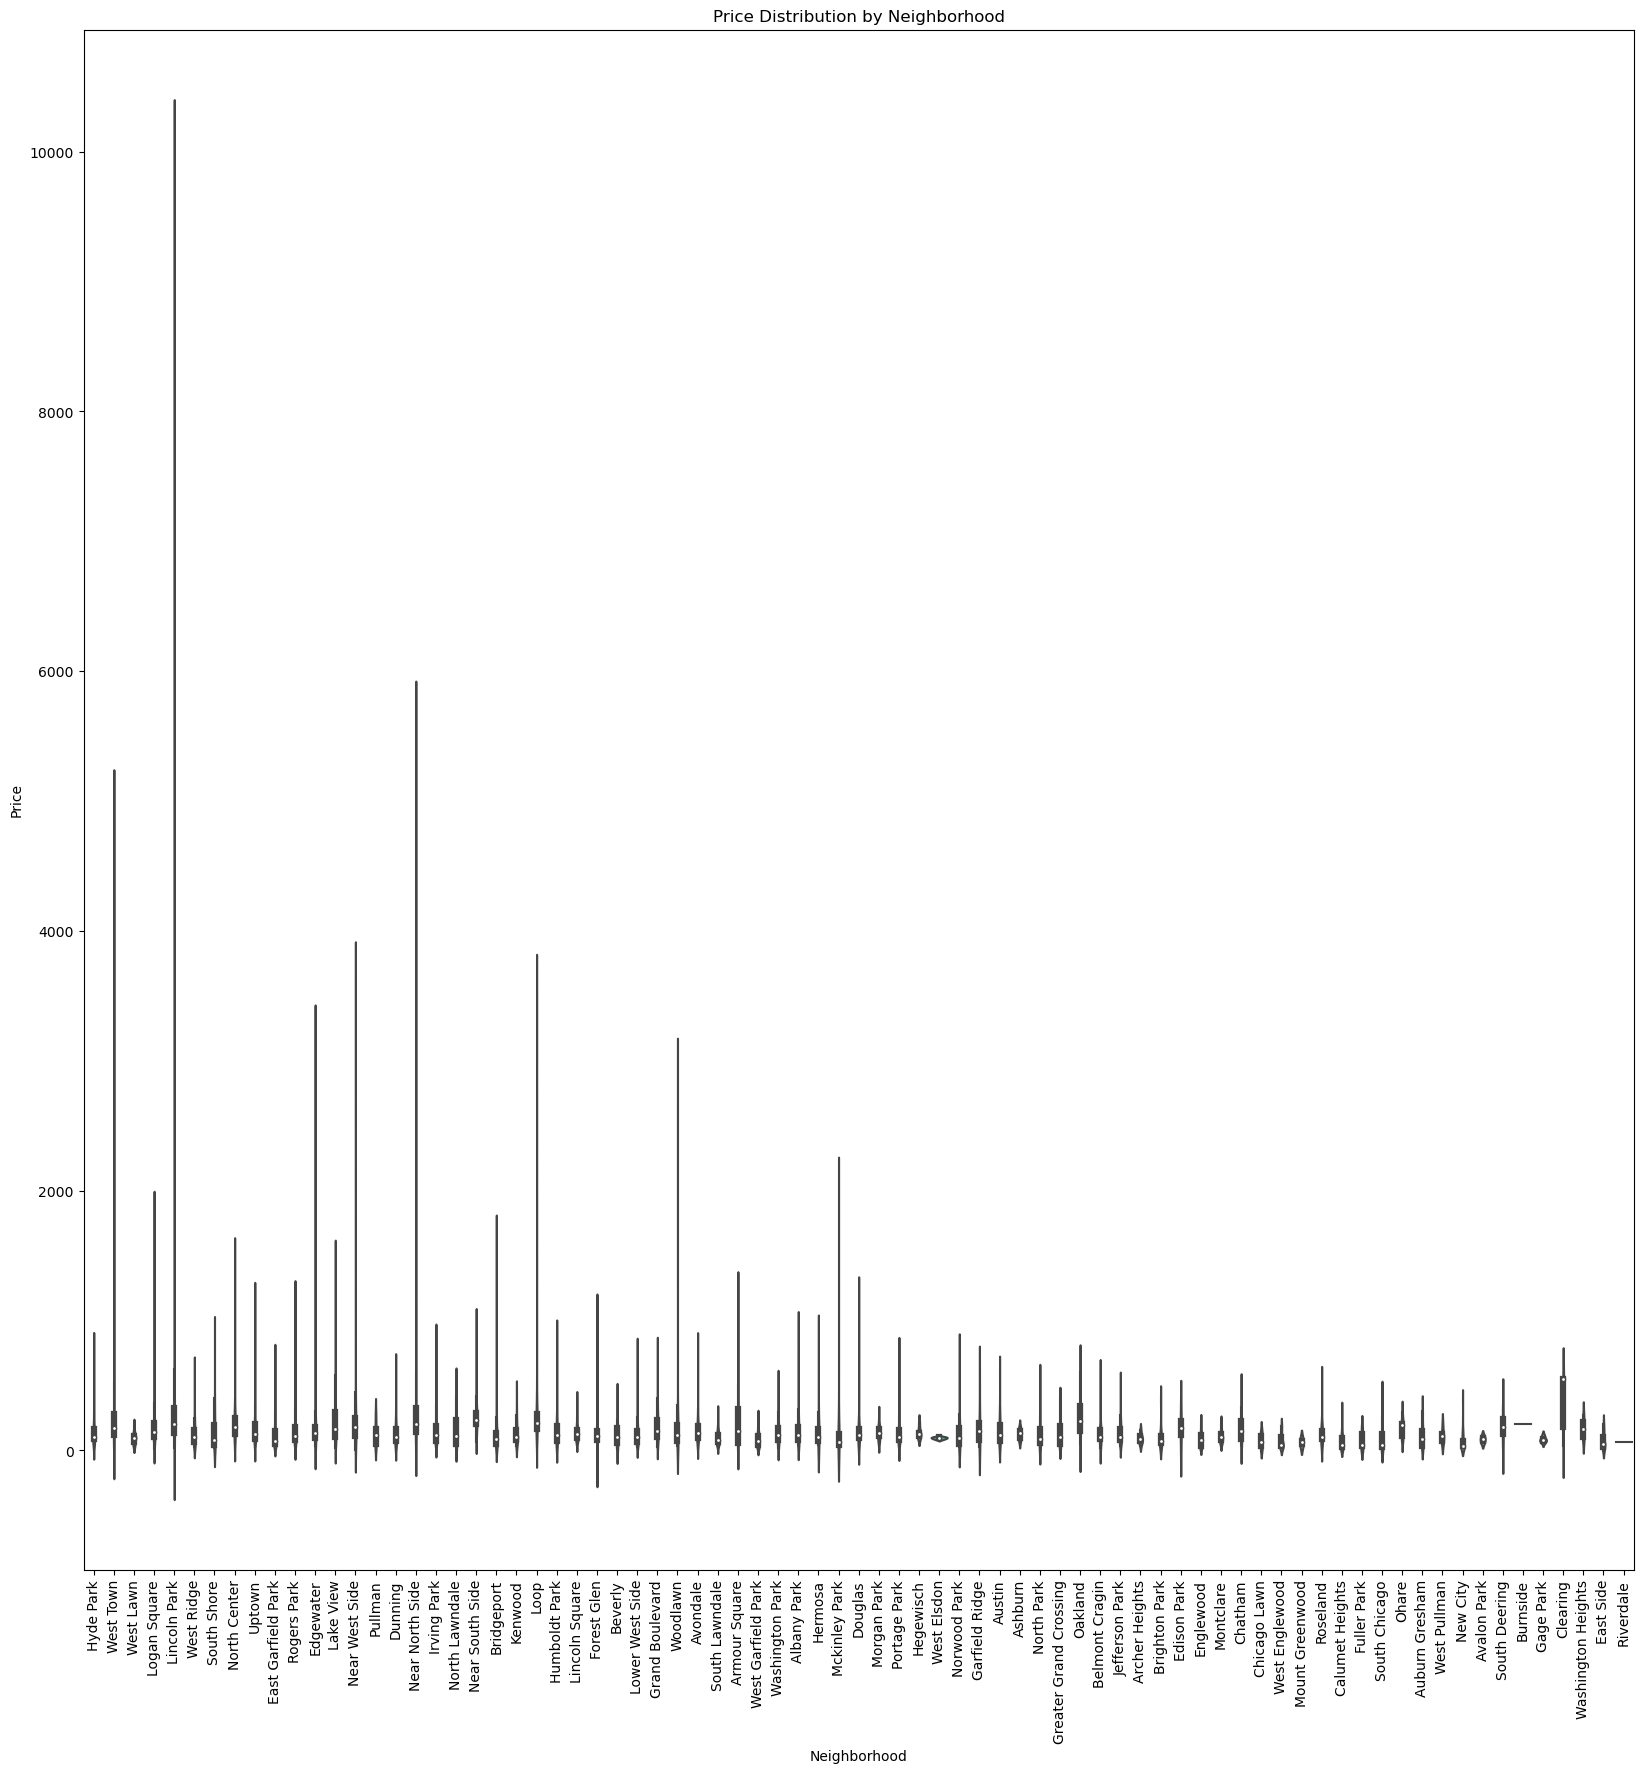

In [35]:
plt.figure(figsize=(20,20))
sns.violinplot(x='neighbourhood', y='price', data=df)
plt.title('Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

### Number of Listings by Neighborhood 

#### The distribution of listings by neighborhood varies, with some neighborhoods having significantly more listings than others, like near north side or west town, maybe because they're popular, well-located, and attract both hosts and guests.

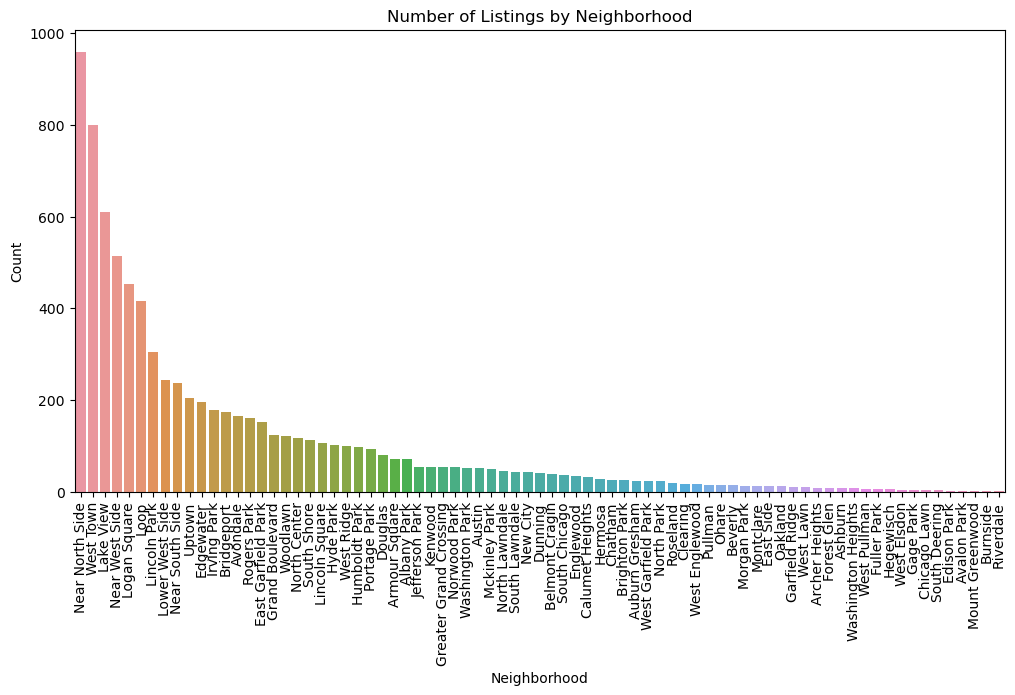

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index)
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
